# Cai XiaoYi-task1

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('REGRES.txt', sep='\s+', names=['air_speed', 'temperature', 'acid_concentration', 'loss_of_ammonia'])
#citys=pd.read_table('./1.txt',sep='\t',header=None)

In [68]:
dependent = df.loss_of_ammonia

In [69]:
independent = df.drop(columns = ['loss_of_ammonia'])

In [70]:
independent.corr(method = 'pearson')

,air_speed,temperature,acid_concentration
air_speed,1.000000,0.781852,0.500143
temperature,0.781852,1.000000,0.390940
acid_concentration,0.500143,0.390940,1.000000


In [71]:
independent.corr(method = 'kendall')

,air_speed,temperature,acid_concentration
air_speed,1.000000,0.595550,0.450595
temperature,0.595550,1.000000,0.265657
acid_concentration,0.450595,0.265657,1.000000


In [72]:
df.corr(method = 'pearson')

,air_speed,temperature,acid_concentration,loss_of_ammonia
air_speed,1.000000,0.781852,0.500143,0.919663
temperature,0.781852,1.000000,0.390940,0.875504
acid_concentration,0.500143,0.390940,1.000000,0.399830
loss_of_ammonia,0.919663,0.875504,0.399830,1.000000


In [73]:
df.corr(method = 'kendall')

,air_speed,temperature,acid_concentration,loss_of_ammonia
air_speed,1.000000,0.595550,0.450595,0.802082
temperature,0.595550,1.000000,0.265657,0.733681
acid_concentration,0.450595,0.265657,1.000000,0.378831
loss_of_ammonia,0.802082,0.733681,0.378831,1.000000


In [74]:
from patsy import dmatrices

In [75]:
from sklearn import linear_model
import statsmodels.api as sm

In [76]:
y, X = dmatrices('loss_of_ammonia ~ air_speed + temperature + acid_concentration', data=df, return_type='dataframe')

In [77]:
y.head()

,loss_of_ammonia
0,42.0
1,37.0
2,37.0
3,28.0
4,18.0


In [78]:
X.head()

,Intercept,air_speed,temperature,acid_concentration
0,1.0,80.0,27.0,89.0
1,1.0,80.0,27.0,88.0
2,1.0,75.0,25.0,90.0
3,1.0,62.0,24.0,87.0
4,1.0,62.0,22.0,87.0


In [79]:
independent

,air_speed,temperature,acid_concentration
0,80.0,27.0,89.0
1,80.0,27.0,88.0
2,75.0,25.0,90.0
3,62.0,24.0,87.0
4,62.0,22.0,87.0
5,62.0,23.0,87.0
6,62.0,24.0,93.0
7,62.0,24.0,93.0
8,58.0,23.0,87.0
9,58.0,18.0,80.0


In [80]:
regr = linear_model.LinearRegression()
regr.fit(independent, dependent)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
independent = sm.add_constant(independent) # adding a constant
 
model = sm.OLS(dependent, independent).fit()
predictions = model.predict(independent) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -39.91967442012402
Coefficients: 
 [ 0.7156402   1.29528612 -0.15212252]
                            OLS Regression Results                            
Dep. Variable:        loss_of_ammonia   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     59.90
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           3.02e-09
Time:                        21:34:00   Log-Likelihood:                -52.288
No. Observations:                  21   AIC:                             112.6
Df Residuals:                      17   BIC:                             116.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [81]:
model.params[1]

0.7156402004852842

In [82]:
model.params[2]

1.295286124388572

In [83]:
model.params[3]

-0.1521225191486514

In [84]:
dof = 17

In [85]:
from scipy import stats

In [86]:
stats.t.isf(0.025, dof)

2.109815577833181

In [88]:
(model.params[1]-0)/model.bse[1]

5.306613006837226

In [89]:
(model.params[2]-0)/model.bse[2]

3.5195671769870214

In [90]:
(model.params[3]-0)/model.bse[3]

-0.9733097691168313

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [92]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=2, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [93]:
sfs1 = sfs1.fit(independent, dependent)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-12-02 21:34:41] Features: 1/2 -- score: -40.25366163125594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-12-02 21:34:41] Features: 2/2 -- score: -34.47939669298703

In [94]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['air_speed', 'temperature']


In [95]:
X = independent[['air_speed', 'temperature']]

In [96]:
y = dependent

In [97]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
independent = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

Intercept: 
 -50.35884007399061
Coefficients: 
 [0.67115444 1.29535137]


In [98]:
residuals = model.resid
print(residuals)

0     17.592452
1     12.592452
2     14.135784
3      8.908410
4     -0.977287
5     -1.034439
6     -0.091590
7      0.908410
8     -2.891216
9     -3.605458
10    -3.605458
11    -4.548307
12    -6.605458
13    -5.662610
14    -7.319013
15    -8.319013
16    -7.376164
17    -7.376164
18    -6.433316
19    -2.148150
20    -6.149430
dtype: float64


In [99]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [100]:
multi_model = ols('loss_of_ammonia ~ air_speed + temperature', data=df).fit()

In [101]:
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:        loss_of_ammonia   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     89.64
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           4.38e-10
Time:                        21:34:47   Log-Likelihood:                -52.857
No. Observations:                  21   AIC:                             111.7
Df Residuals:                      18   BIC:                             114.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -50.3588      5.138     -9.801      

eval_env: 1


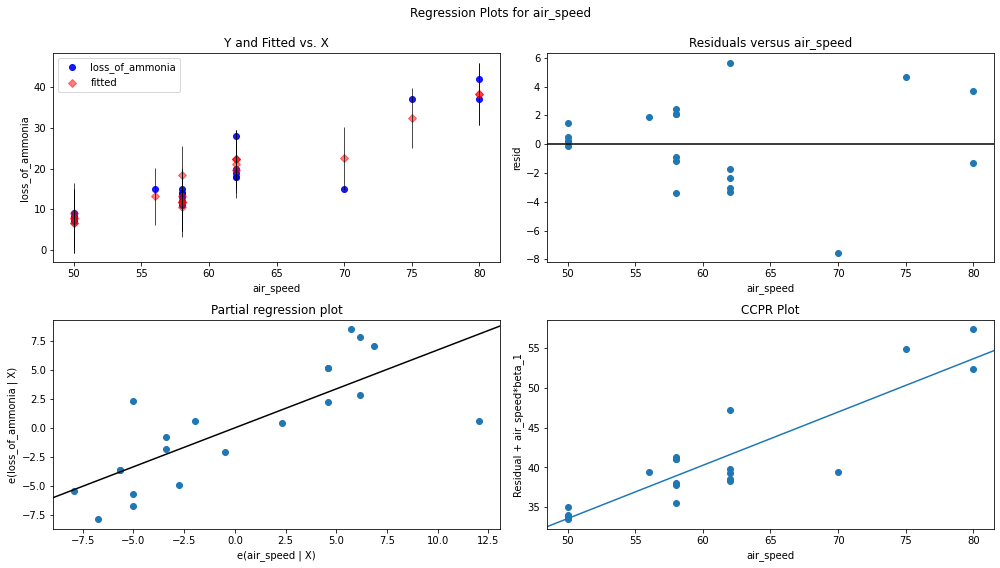

In [102]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'air_speed', fig=fig)

eval_env: 1


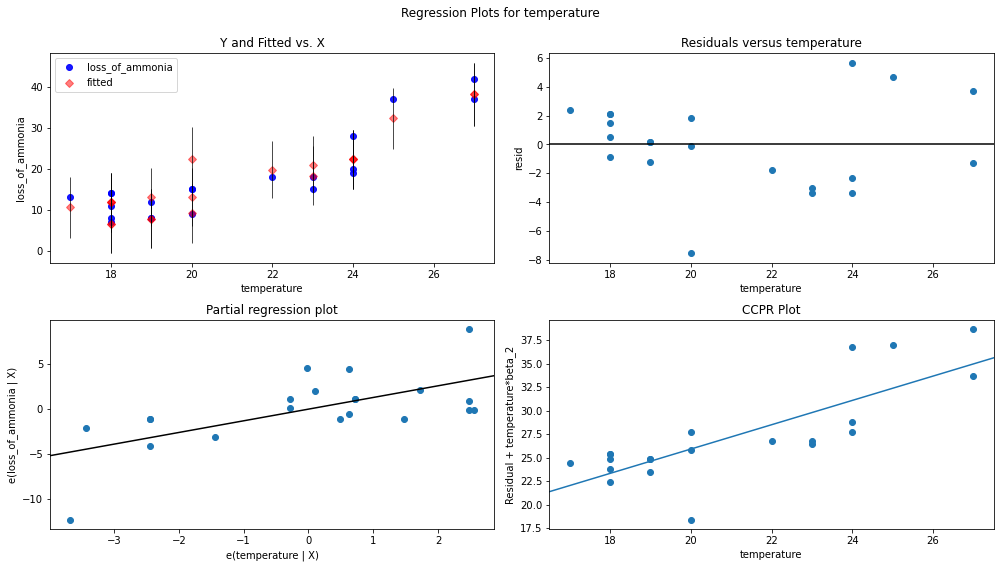

In [103]:
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'temperature', fig=fig)

In [104]:
y = df.loss_of_ammonia

In [105]:
X = df.drop(columns = ['loss_of_ammonia','acid_concentration'])

## We used the original data, using the fourth day's data as the independent variable to predict the dependent variable.

In [106]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
X4 = X.iloc[3]
predictions = model.predict(X4) 

In [107]:
predictions

None    22.341168
dtype: float64

**The predicted value of loss_of_ammonia is 19.750465**